In [25]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.lines import Line2D

current_directory = os.getcwd()
attack_operation_record = pd.read_csv(current_directory+ '\\data_analysis\\attack_operation_record_5000.csv')
mtd_operation_record = pd.read_csv(current_directory+'\\data_analysis\\mtd_operation_record_5000.csv')

In [26]:
mtd_operation_record.head()

,name,start_time,finish_time,duration,executed_at
0,osdiversity,0.000000,30.091927,30.091927,application
1,HostTopologyShuffle,30.177796,90.686658,60.508861,network
2,HostTopologyShuffle,90.733677,151.398087,60.664410,network
3,HostTopologyShuffle,152.745223,214.386342,61.641119,network
4,PortShuffle,182.980334,218.660428,35.680095,application


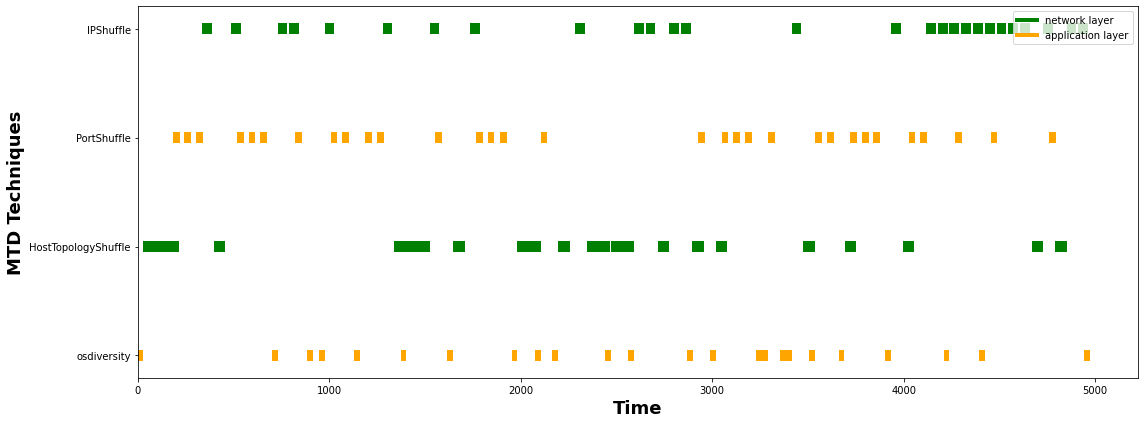

In [27]:
mtd_operation_record['color'] = np.where(mtd_operation_record['executed_at']=='network', 'green', 'orange')
fig, ax = plt.subplots(1, figsize=(16, 6))
ax.barh(mtd_operation_record['name'], mtd_operation_record['duration'], left=mtd_operation_record['start_time'], height=0.1, color=mtd_operation_record['color'])


custom_lines_mtd = [Line2D([0], [0], color='green', lw=4),
                    Line2D([0], [0], color='orange', lw=4)]
ax.legend(custom_lines_mtd, ['network layer', 'application layer'], loc='upper right')
plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('MTD Techniques', weight='bold', fontsize=18)
fig.tight_layout()
plt.savefig('data_analysis/mtd_record.png')
plt.show()

In [28]:
attack_operation_record.head()

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
0,SCAN_HOST,0.000000,10.000000,10.000000,-1,0,0,0,None,[],None,None
1,ENUM_HOST,10.000000,25.000000,15.000000,-1,0,0,0,None,[],None,None
2,SCAN_PORT,25.000000,30.091927,5.091927,0,1,0,0,None,[],application,osdiversity
3,SCAN_PORT,32.091927,52.091927,20.000000,0,1,0,0,None,[],None,None
4,EXPLOIT_VULN,52.091927,77.477107,25.385180,0,1,0,0,None,[],None,None


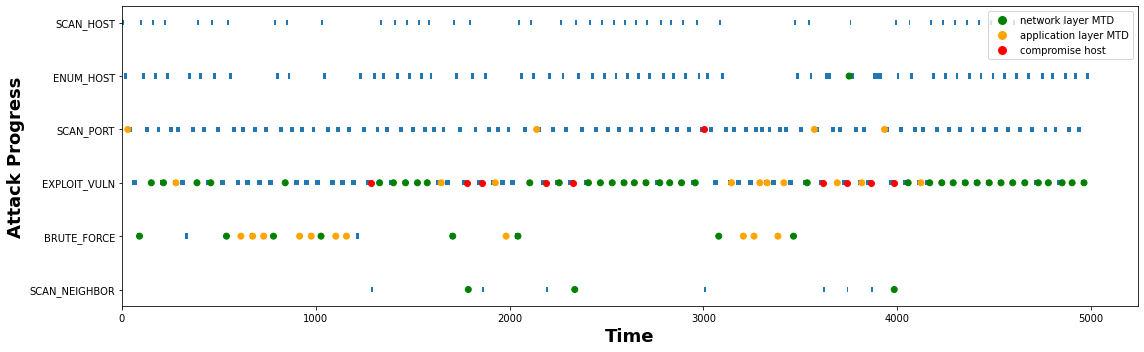

In [29]:
fig2, ax2 = plt.subplots(1, figsize=(16, 5))
ax2.barh(attack_operation_record['name'], attack_operation_record['duration'], left=attack_operation_record['start_time'], height=0.1, zorder=1)


interrupted_record = attack_operation_record[attack_operation_record['interrupted_in']!='None']
interrupted_record['color'] = np.where(interrupted_record['interrupted_in']=='network', 'green', 'orange')
ax2.scatter(interrupted_record['finish_time'], interrupted_record['name'], color=interrupted_record['color'], zorder=3)


compromise_record = attack_operation_record[attack_operation_record['compromise_host'] != 'None']
ax2.scatter(compromise_record['finish_time'], compromise_record['name'], color='red', zorder=2)


custom_lines_attack = [Line2D([0], [0], marker='o',color='w', markerfacecolor='green', markersize=10),
                       Line2D([0], [0], marker='o',color='w', markerfacecolor='orange', markersize=10),
                       Line2D([0], [0], marker='o',color='w', markerfacecolor='red', markersize=10),]

ax2.legend(custom_lines_attack, ['network layer MTD', 'application layer MTD', 'compromise host'], loc='upper right')

plt.gca().invert_yaxis()
plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('Attack Progress', weight='bold', fontsize=18)
fig2.tight_layout()
plt.savefig('data_analysis/attack_record.png')
plt.show()

In [30]:
attack_operation_record[(attack_operation_record['name'] == 'SCAN_PORT') & (attack_operation_record['compromise_host'] != 'None')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
182,SCAN_PORT,2985.123133,3005.123133,20.0,28,2,165,5,28,"['Lisha', 'Corilla', 'Amalle', 'Jorrie']",None,None


In [31]:
attack_operation_record[(attack_operation_record['name'] == 'EXPLOIT_VULN') & (attack_operation_record['compromise_host'] != 'None')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
75,EXPLOIT_VULN,1256.797226,1283.306665,26.509439,1,2,79,0,1,"['Eloisa', 'Alessandra', 'Eugenia', 'Annabella...",None,None
106,EXPLOIT_VULN,1753.826265,1780.523498,26.697233,42,3,104,1,42,"['Nikolia', 'Pooh', 'Ellen', 'Jillane', 'Olympe']",None,None
111,EXPLOIT_VULN,1834.031996,1860.333577,26.301582,22,5,113,2,22,"['Anastasie', 'Leigh', 'Rakel', 'Gabriell', 'R...",None,None
130,EXPLOIT_VULN,2161.853901,2186.999872,25.145971,64,1,135,3,64,"['Dorrie', 'Darcy', 'Delila', 'Nell', 'Kerrin']",None,None
138,EXPLOIT_VULN,2303.132098,2328.186176,25.054078,66,1,154,4,66,"['Allissa', 'Dixie', 'Jessalyn', 'Blanca']",None,None
218,EXPLOIT_VULN,3594.380707,3619.875223,25.494516,63,3,176,6,63,"['Amaleta', 'Jocelyne', 'Jennine', 'Aurelea', ...",None,None
225,EXPLOIT_VULN,3712.914385,3738.668100,25.753714,25,2,196,7,25,"['Tarah', 'Sophronia', 'Dorette', 'Silva', 'Ba...",None,None
233,EXPLOIT_VULN,3839.632837,3864.688227,25.055389,65,2,247,8,65,"['Fallon', 'Brunhilda', 'Lanni']",None,None
240,EXPLOIT_VULN,3956.858295,3982.228905,25.370610,63,5,277,9,63,"['Florina', 'Mignon', 'Griselda', 'Morena']",None,None


In [32]:
attack_operation_record[(attack_operation_record['name'] == 'BRUTE_FORCE') & (attack_operation_record['compromise_host'] != 'None')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
